# بررسی فرض دوم
شرح فرض : در این فرض بررسی می کنیم که درسترس بودن یک اتاق در طول سال به چه عواملی بستگی دارد. فرض ما این است که دردسترس بودن یک نوع اتاق با تعداد اتاق های موجود  از آن نوع رابطه مستقیم و با قیمت آن نوع اتاق رابطه عکس دارد.

ابتدا دیتاست مربوط را اپلود کرده و آن را فراخوانی می کنیم

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files
import io
plt.style.use('seaborn-white')

data = files.upload()

csv = pd.read_csv(io.StringIO(data['AB_NYC_2019.csv'].decode('utf-8')))

Saving AB_NYC_2019[1].csv to AB_NYC_2019[1] (2).csv


در این بخش داده ها را بارگیری می کنیم

In [ ]:
df = pd.read_csv('AB_NYC_2019[1].csv')
df

In [28]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df['room_type'].value_counts()
df.rename(columns={
'neighbourhood_group': 'city'
}, inplace=True)
df

برای بررسی عامل اول یعنی تاثیر تعداد اتاق های موجود در هر محله بر دردسترس بودن آن نوع اتاق در طول سال نمودار میله ای زیر را ترسیم می کنیم.

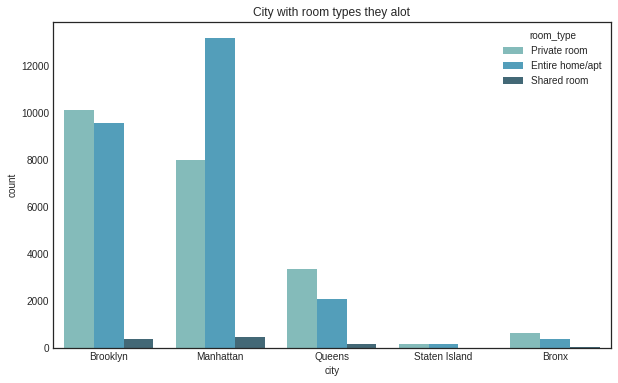

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='city',hue='room_type',palette='GnBu_d')
plt.title('City with room types they alot')
plt.show()

با توجه به نمودار بالا واضح است که در تمام محله های مورد بررسی اتاق های اشتراکی (شیرد روم) کمترین تعداد اتاق را در مقایسه با دو نوع دیگر در اختیار دارند

در نمودار زیر به بررسی عامل دوم یعنی قیمت انواع اتاق ها می پردازیم.

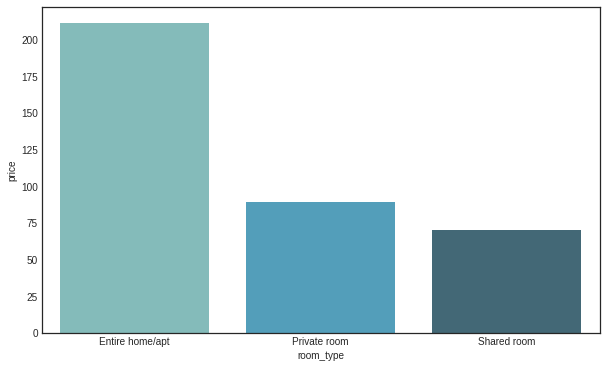

In [39]:
##mean price for room type
rtype = df.groupby('room_type', as_index=False)[['price']].mean()

plt.figure(figsize=(10,6))
sns.barplot(data=rtype, x=rtype['room_type'], y=rtype['price'], palette='GnBu_d');


همانطور که در نمودار بالا واضح است

1. The price of entire home/apt is more than any other room type. 
2. Shared room is the cheapest.




در این مرحله برای مشخص شدن درستی یا نادرستی فرض مان دسترسی انواع اتاق ها در طول سال را در دیتاست خود بررسی می کنیم. 

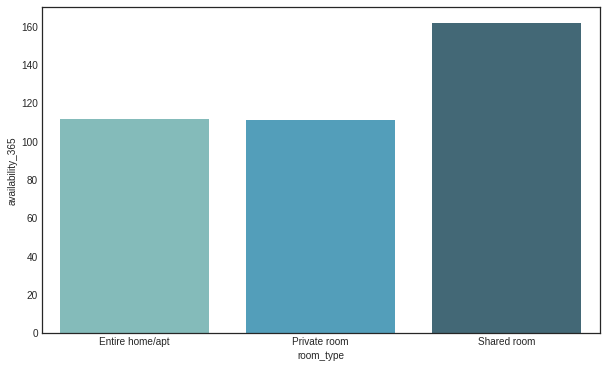

In [40]:
# Airbnb dataset groupby room_type with 'availability_365'-mean
ngroup = df.groupby('room_type', as_index=False)[['availability_365']].mean()

plt.figure(figsize=(10,6))
sns.barplot(data=ngroup, x=ngroup['room_type'], y=ngroup['availability_365'], palette='GnBu_d');

همانطور که در نمودار میله ای بالا مشخص است اتاق های اشتراکی در طول سال از سایر اتاق ها بیشتر در دسترس هستند.

#نتیجه گیری
همانطور که در نمودار های بالا مشاهده کردیم برخلاف فرض، در دسترس بودن یک نوع اتاق به تنهایی وابسته به قیمت و تعداد اتاق موجود نیست. برای نمونه علی رغم اینکه اتاق های اشتراکی کمترین تعداد اتاق را دارا هستند و همچنین کمترین قیمت را در مقایسه با سایر اتاق ها دارند اما در طول سال بیشتر از سایر اتاق ها در دسترس هستند. این نشان دهنده عدم رغبت مسافران به اجاره اتاق های اشتراکی می باشد. به طور کلی می توان گفت که حریم خصوصی ، امکانات رفاهی و مدیریت زمان و فضای سکونت از عوامل و متغیر های اصلی برای انتخاب و اجاره یک اتاق می باشد.

# نمودار زیر به وضوح صحت نتیجه گیری بالا را نشان می دهد

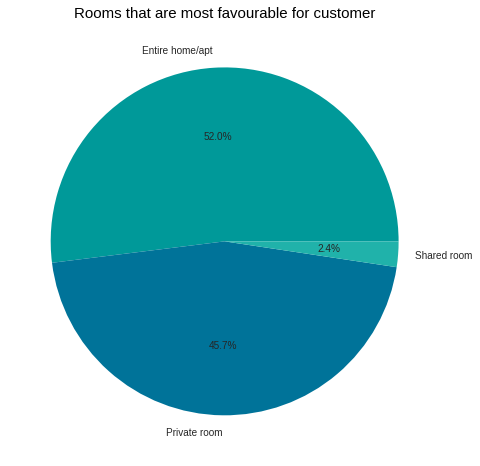

In [41]:
#The rooms that customers choose the most
labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'] )
plt.title("Rooms that are most favourable for customer", color = 'black',fontsize = 15);
